# Prescriptive Portfolio Optimization

## 1. Introduction
This notebook demonstrates a prescriptive portfolio optimization model. It ingests asset price data, calculates risk metrics, and uses Mean-Variance Optimization (MVO) to suggest an optimal asset allocation that maximizes the Sharpe Ratio.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_generator import generate_synthetic_data, fetch_data
from optimizer import PortfolioOptimizer
from analysis import calculate_portfolio_performance, stress_test, plot_performance_comparison, get_cumulative_returns

%matplotlib inline
plt.style.use('seaborn-v0_8')

## 2. Data Loading & Preprocessing
We will generate a synthetic dataset representing 5 assets over a 3-year period. In a real scenario, this would be replaced by `fetch_data(['AAPL', ...])`.

Data Shape: (1000, 6)


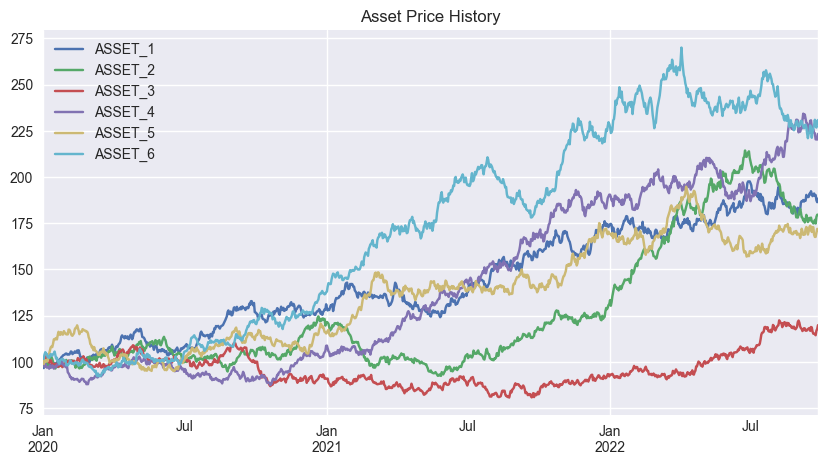

In [2]:
# Generate synthetic data
df_prices = generate_synthetic_data(n_assets=6, n_days=1000, seed=123)

# Calculate Daily Returns
df_returns = df_prices.pct_change().dropna()

print("Data Shape:", df_prices.shape)
df_prices.plot(figsize=(10, 5), title="Asset Price History")
plt.show()

## 3. Baseline Portfolio
Let's assume an equal-weighted portfolio as our baseline to benchmark against.

In [3]:
assets = df_prices.columns
n_assets = len(assets)
baseline_weights = {asset: 1/n_assets for asset in assets}

# Calculate Baseline Performance
baseline_metrics = calculate_portfolio_performance(baseline_weights, df_returns)
print("Baseline Performance:")
print(baseline_metrics)

Baseline Performance:
Annualized Return        0.162656
Annualized Volatility    0.064684
Sharpe Ratio             2.205432
dtype: float64


## 4. Optimization (Max Sharpe Ratio)
We use `PyPortfolioOpt` to find the weights that maximize the Sharpe Ratio.

In [4]:
optimizer = PortfolioOptimizer(df_prices)
mu, S = optimizer.get_current_metrics()

# Optimize for Max Sharpe
optimal_weights, opt_results = optimizer.optimize_max_sharpe()

print("\nOptimal Weights (Max Sharpe):")
print(pd.Series(optimal_weights))

print("\nOptimized Performance from Optimizer:")
print(f"Expected Annual Return: {opt_results[0]:.2%}")
print(f"Annual Volatility: {opt_results[1]:.2%}")
print(f"Sharpe Ratio: {opt_results[2]:.2f}")

Expected annual return: 19.0%
Annual volatility: 7.0%
Sharpe Ratio: 2.43

Optimal Weights (Max Sharpe):
ASSET_1    0.18782
ASSET_2    0.15501
ASSET_3    0.04638
ASSET_4    0.25460
ASSET_5    0.11133
ASSET_6    0.24486
dtype: float64

Optimized Performance from Optimizer:
Expected Annual Return: 19.03%
Annual Volatility: 7.02%
Sharpe Ratio: 2.43


## 5. Performance Comparison
Let's visually compare the Baseline vs. Optimized portfolio.

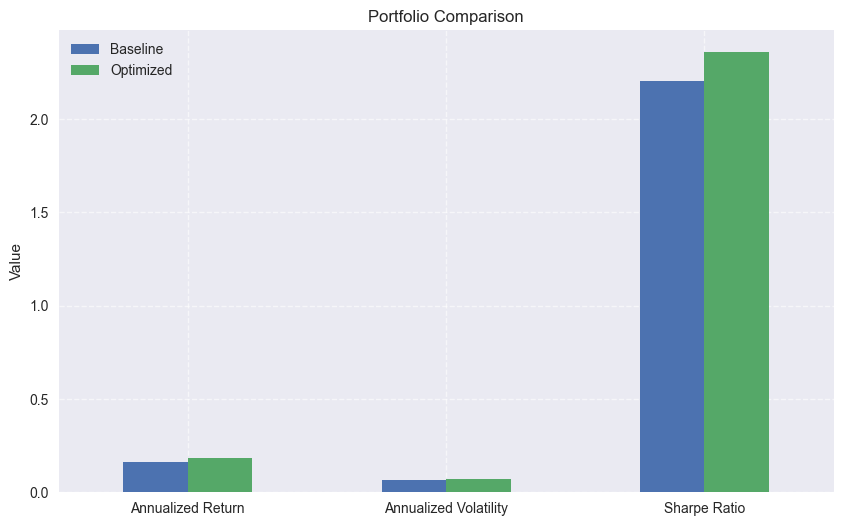

In [5]:
# Recalculate metrics on the same returns data standard
opt_metrics = calculate_portfolio_performance(optimal_weights, df_returns)

plot_performance_comparison(baseline_metrics, opt_metrics)

### Cumulative Returns

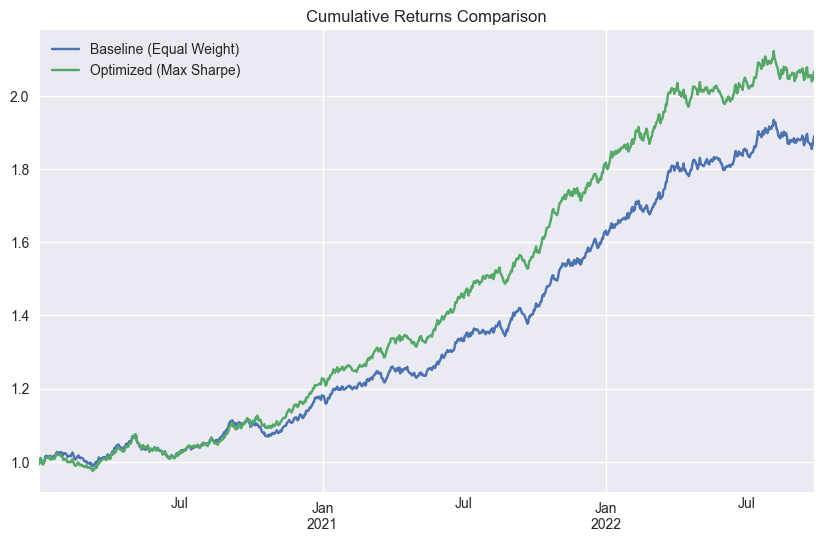

In [6]:
base_cum_ret = get_cumulative_returns(baseline_weights, df_returns)
opt_cum_ret = get_cumulative_returns(optimal_weights, df_returns)

plt.figure(figsize=(10, 6))
base_cum_ret.plot(label='Baseline (Equal Weight)')
opt_cum_ret.plot(label='Optimized (Max Sharpe)')
plt.legend()
plt.title("Cumulative Returns Comparison")
plt.show()

## 6. Stress Testing / Scenario Analysis
We simulate how the portfolios would behave under hypothetical market shocks.

In [7]:
scenarios = {
    'Market Correction (-10%)': -0.10,
    'Recession (-20%)': -0.20,
    'Bull Market (+15%)': 0.15
}

stress_df = stress_test(optimal_weights, df_returns, scenarios)
print("Stress Test Results (Optimized Portfolio):")
print(stress_df)

Stress Test Results (Optimized Portfolio):
                       Base Case  Market Correction (-10%)  Recession (-20%)  \
Annualized Return       0.185640                  0.167076          0.148512   
Annualized Volatility   0.070237                  0.105356          0.105356   
Sharpe Ratio            2.358300                  1.395996          1.219793   

                       Bull Market (+15%)  
Annualized Return                0.213486  
Annualized Volatility            0.070237  
Sharpe Ratio                     2.754757  


## 7. Conclusion
By rebalancing the portfolio according to the Mean-Variance Optimization model, we observe a higher Sharpe ratio, indicating a better risk-adjusted return compared to the baseline equal-weighted strategy. The stress tests provide insight into potential downside risks.